In [2]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


# Simulate with the Jansen and Rit model. 

White noise is added to one specific state variable to emulate the external
stochastic stimulus p(t) as described in [JansenRit_1995]

WARNING  File 'hemispheres' not found in ZIP.


<IPython.core.display.Javascript object>


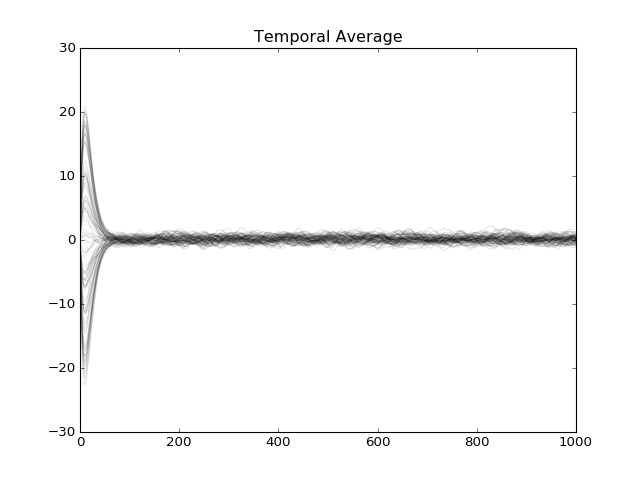

In [6]:
jrm = models.JansenRit(mu=0., v0=6.)

phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max-jrm.p_min) * 0.5 )**2 / 2.
sigma         = numpy.zeros(6) 
sigma[3]      = phi_n_scaling

# the other aspects of the simulator are standard
sim = simulator.Simulator(
    model=jrm,
    connectivity=connectivity.Connectivity(load_default=True),
    coupling=coupling.SigmoidalJansenRit(a=10.0),
    integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
    monitors=monitors.TemporalAverage(period=2 ** -2),
    simulation_length=1e3,
).configure()

# run it
(time, data), = sim.run()

# visualize time series
figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1)
title("Temporal Average")